In [130]:
#loading required libraries
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt

# Correlation test
from scipy import stats
from scipy.stats import pearsonr

# RMSE
from sklearn.metrics import mean_squared_error,r2_score

# Splitting the data
from sklearn.model_selection import train_test_split

# Linear Regression library
from sklearn.linear_model import LinearRegression



In [131]:
# loading required dataset

# MODIS Dataset
bauchi_modis=pd.read_csv('Bauchi-MODIS.csv')
plateau_modis= pd.read_csv('Plateau-MODIS.csv')

# VIIRS Dataset
bauchi_viirs = pd.read_csv('Bauchi-VIIRS.csv')
plateau_viirs = pd.read_csv('Plateau-VIIRS.csv')

## Understanding the data

### Region: Bauchi

In [132]:
bauchi_modis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:time_start  549 non-null    object 
 1   NDVI               549 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [133]:
bauchi_viirs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:time_start  550 non-null    object 
 1   NDVI               550 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


- Both datasets do not contain missing values.
- The date is an object datatype

### Region: Plateau

In [134]:
plateau_modis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:time_start  549 non-null    object 
 1   NDVI               549 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [135]:
plateau_viirs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:time_start  550 non-null    object 
 1   NDVI               550 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


- Both datasets do not contain missing values.
- The date is an object datatype

# More Analysis

## Region: Bauchi

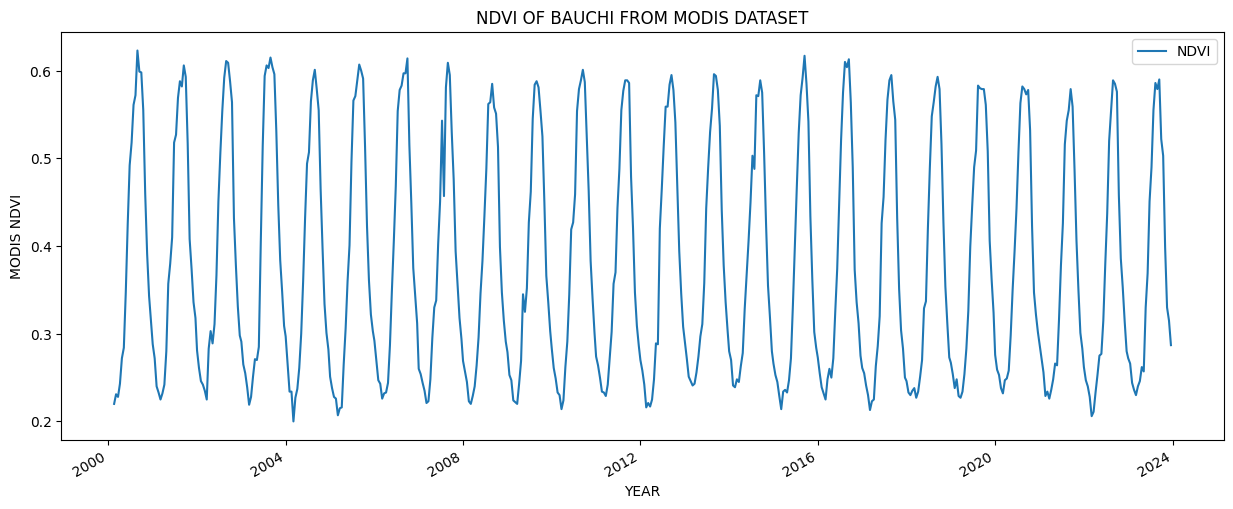

In [136]:
# Creating a time series plot

#converting the date to a datetime object
bauchi_modis['date']=pd.to_datetime(bauchi_modis['system:time_start'])

#setting the datetime as the index
bauchi_modis.set_index('date', inplace=True)

#line plot

bauchi_modis.plot(figsize=(15,6))
plt.title('NDVI OF BAUCHI FROM MODIS DATASET')
plt.xlabel('YEAR')
plt.ylabel('MODIS NDVI')
plt.show()

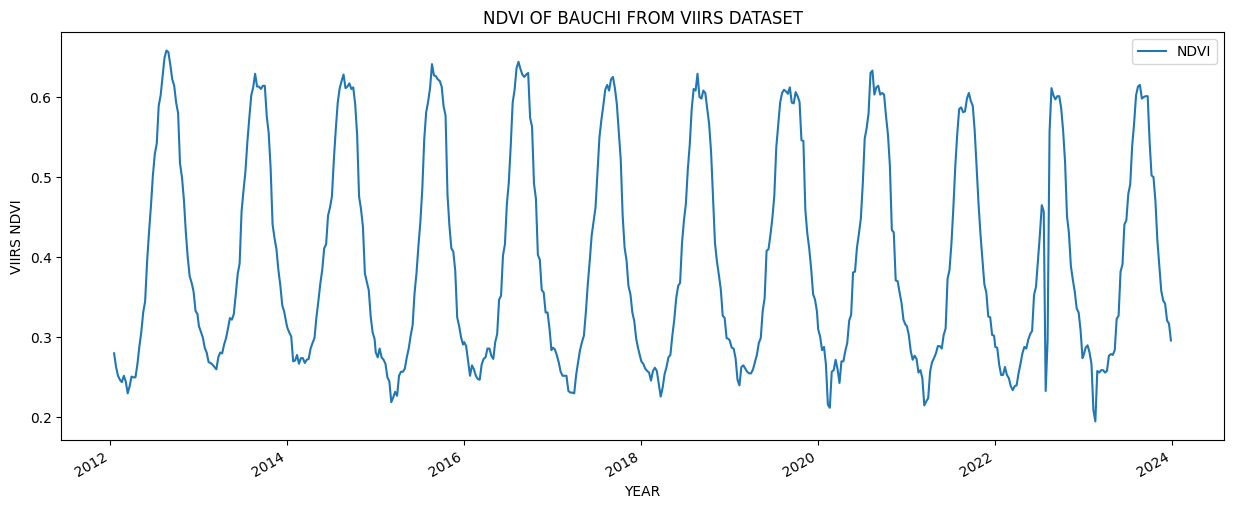

In [137]:
#creating a time series plot

#converting the date to a datetime object
bauchi_viirs['date']=pd.to_datetime(bauchi_viirs['system:time_start'])

#setting the datetime as the index
bauchi_viirs.set_index('date', inplace=True)

#line plot
bauchi_viirs.plot(figsize=(15,6))
plt.title('NDVI OF BAUCHI FROM VIIRS DATASET')
plt.xlabel('YEAR')
plt.ylabel('VIIRS NDVI')
plt.show()

### Correlation Test

In [138]:
# Merging the two Datasets
merged_df = pd.merge(bauchi_modis, bauchi_viirs, on=['date'], how='inner',)

# Dropping unnecessary columns
merged_df.drop(['system:time_start_x','system:time_start_y'],axis=1,inplace=True)

## Calculate Pearson correlation coefficient 
correlation_coefficient, p_value = pearsonr(merged_df['NDVI_x'], merged_df['NDVI_y'])

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Pearson Correlation Coefficient: 0.9842276711662477


### Performing Correlation on Resampled Data

In [139]:
#MODIS
# Dropping unnecessary columns
bauchi_modis.drop(['system:time_start'],axis=1,inplace=True)
# Performing resampling on  Modis NDVI column, and calculating the mean for each month
resample_bauchi_modis=bauchi_modis.resample('M').mean()
resample_bauchi_modis


#VIIRS
# Dropping unnecessary columns
bauchi_viirs.drop(['system:time_start'],axis=1,inplace=True)
# Performing resampling on Viirs NDVI column, and calculating the mean for each month
resample_bauchi_viirs=bauchi_viirs.resample('M').mean()
resample_bauchi_viirs


#MERGING
# Merging the resampled Dataframes
resample_bauchi_merged_df = pd.merge(resample_bauchi_modis, resample_bauchi_viirs, left_index=True, right_index=True)
resample_bauchi_merged_df


## Calculate Pearson correlation coefficient 
correlation_coefficient, p_value = pearsonr(resample_bauchi_merged_df['NDVI_x'], resample_bauchi_merged_df['NDVI_y'])

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")


Pearson Correlation Coefficient: 0.9919022766579455


### Checking the RMSE

In [140]:
# loading required library
from sklearn.metrics import mean_squared_error

# Definining the actual and predicted
y_actual=resample_bauchi_merged_df['NDVI_y']  # VIIRS NDVI
y_predicted=resample_bauchi_merged_df['NDVI_x'] #MODIS NDVI

# Performing the RMSE
bauchi_rmse = mean_squared_error(y_actual, y_predicted, squared=False)
bauchi_rmse

0.025003886657754375

### Hypothesis Testing

1.Hypothesis
- Null hypothesis: VIIRS NDVI is not equal to MODIS NDVI
- Alternative hypothesis : VIIRS NDVI is equal to MODIS NDVI

2.Significance level(alpha=0.05)

3.Test Statistic - Z test (large sample size and known standard deviation)

3.Critical Value / P-value

4.Decision

In [141]:
# Calculating the mean of MODIS and VIIRS dataset
mean_bauchi_modis= resample_bauchi_merged_df['NDVI_x'].mean()
mean_bauchi_viirs= resample_bauchi_merged_df['NDVI_y'].mean()

#Calculating the standard deviation of MODIS and VIIRS dataset
std_bauchi_modis= np.std(resample_bauchi_merged_df['NDVI_x'],ddof=1)
std_bauchi_viirs=  np.std(resample_bauchi_merged_df['NDVI_y'],ddof=1)

# Calculating the sample size
n_bauchi_modis=len(resample_bauchi_merged_df['NDVI_x'])
n_bauchi_viirs =len(resample_bauchi_merged_df['NDVI_y'])


#Hypothesis
# Null: mean of MODIS is not equal to mean of VIIRS
# Alternative: mean of MODIS is equal to mean of VIIRS

# Significance level
alpha = 0.05


## USING Z-TABLES
# Calculating the Z-score calculated
z_score_bauchi = (mean_bauchi_modis - mean_bauchi_viirs) / np.sqrt((std_bauchi_modis**2 / n_bauchi_modis) + (std_bauchi_viirs**2 / n_bauchi_viirs))
print('Z-Score Calculated:',z_score_bauchi)

# Calculating Z-tabulated (critical value)
z_critical_bauchi = stats.norm.ppf(1 - alpha/2)
print('Z-Score Tabulated:',z_critical_bauchi)
 
# Decision
if np.abs(z_score_bauchi) > z_critical_bauchi:
    print("""Reject the null hypothesis.There is no significant difference between VIIRS and MODIS. Hence VIIRS and MODIS are equal""")
else:
    print("""Fail to reject the null hypothesis.There is a significant difference between VIIRS and MODIS. Hence VIIRS and MODIS are not equal""")




## USING P-VALUE
# Calculate p-value
p_value_bauchi = 2 * (1 - stats.norm.cdf(np.abs(z_score_bauchi)))  # Two-tailed test
print('P-Value:',p_value_bauchi)

# Decision
if p_value_bauchi < alpha:
    print("Reject the null hypothesis. There is no significant difference. Hence VIIRS and MODIS are equal")
else:
    print("Fail to reject the null hypothesis. There is a significant difference. Hence VIIRS and MODIS are not equal")




Z-Score Calculated: -1.2010358303042283
Z-Score Tabulated: 1.959963984540054
Fail to reject the null hypothesis.There is a significant difference between VIIRS and MODIS. Hence VIIRS and MODIS are not equal
P-Value: 0.22973730283192118
Fail to reject the null hypothesis. There is a significant difference. Hence VIIRS and MODIS are not equal


In [142]:
from statsmodels.stats.weightstats import ztest as ztest

ztest(resample_bauchi_merged_df['NDVI_x'],resample_bauchi_merged_df['NDVI_y'],value=0)

(-1.2010358303042281, 0.22973730283192118)

## Region: Plateau

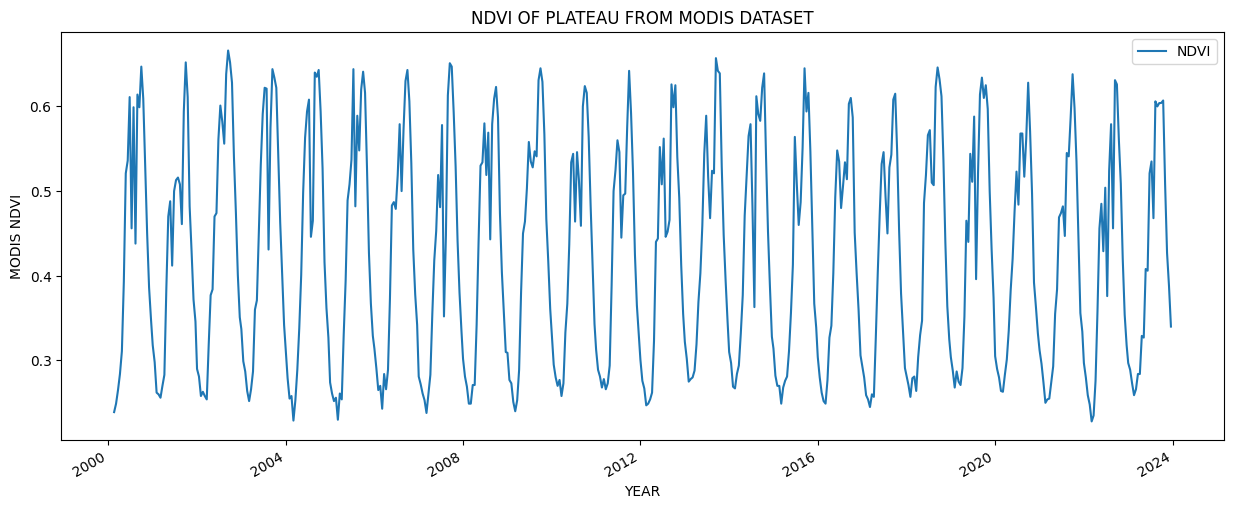

In [143]:
# Creating a time series plot

#converting the date to a datetime object
plateau_modis['date']=pd.to_datetime(plateau_modis['system:time_start'])

#setting the datetime as the index
plateau_modis.set_index('date', inplace=True)

#line plot
plateau_modis.plot(figsize=(15,6))
plt.title('NDVI OF PLATEAU FROM MODIS DATASET')
plt.xlabel('YEAR')
plt.ylabel('MODIS NDVI')
plt.show()

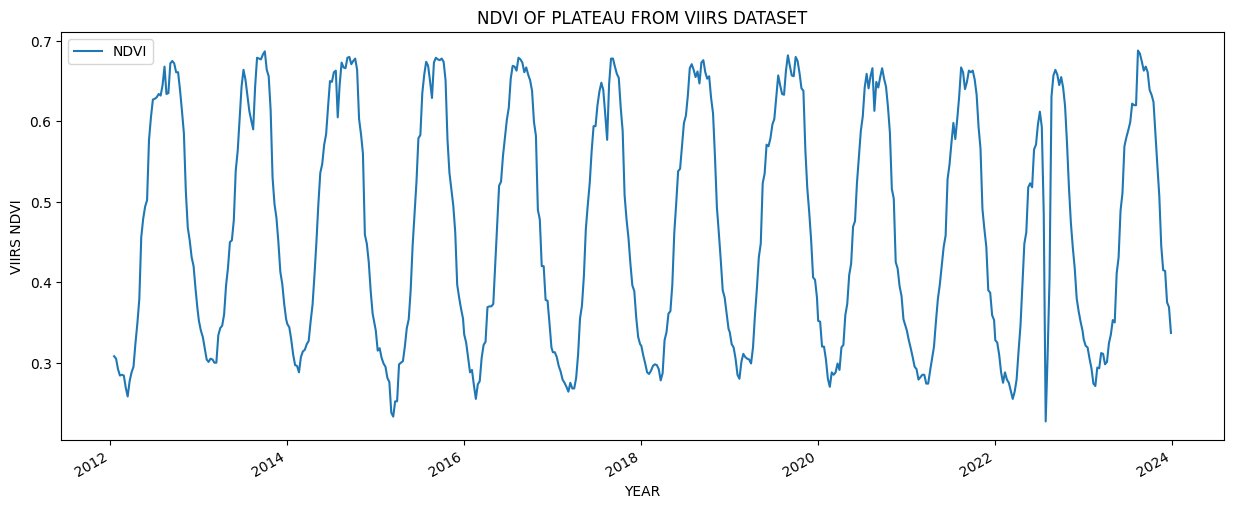

In [144]:
#creating a time series plot

#converting the date to a datetime object
plateau_viirs['date']=pd.to_datetime(plateau_viirs['system:time_start'])

#setting the datetime as the index
plateau_viirs.set_index('date', inplace=True)

#line plot
plateau_viirs.plot(figsize=(15,6))
plt.title('NDVI OF PLATEAU FROM VIIRS DATASET')
plt.xlabel('YEAR')
plt.ylabel('VIIRS NDVI')
plt.show()

### Correlation Test

In [145]:
# Merging the two Datasets
merged_df = pd.merge(plateau_modis, plateau_viirs, on=['date'], how='inner',)

# Dropping unnecessary columns
merged_df.drop(['system:time_start_x','system:time_start_y'],axis=1,inplace=True)

## Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(merged_df['NDVI_x'], merged_df['NDVI_y'])

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Pearson Correlation Coefficient: 0.933863054851532


### Performing Correlation on Resampled Data

In [146]:
## MODIS 
# Dropping unnecessary columns
plateau_modis.drop(['system:time_start'],axis=1,inplace=True)
# Performing resampling on  Modis NDVI column, and calculating the mean for each month
resample_plateau_modis=plateau_modis.resample('M').mean()
resample_plateau_modis



# VIIRS
# Dropping unnecessary columns
plateau_viirs.drop(['system:time_start'],axis=1,inplace=True)
# Performing resampling on Viirs NDVI column, and calculating the mean for each month
resample_plateau_viirs=plateau_viirs.resample('M').mean()
resample_plateau_viirs


# MERGING
# Merging the resampled Dataframes
resample_plateau_merged_df = pd.merge(resample_plateau_modis, resample_plateau_viirs, left_index=True, right_index=True)
resample_plateau_merged_df



## Calculate Pearson correlation coefficient 
correlation_coefficient,p_value= pearsonr(resample_plateau_merged_df['NDVI_x'], resample_plateau_merged_df['NDVI_y'])
# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")



Pearson Correlation Coefficient: 0.9603648984788874


- High correlation results in multicollinearity,which won’t render our model unusable if violated, but it will cause issues with the interpretability of the model.

### Checking the RMSE

In [147]:
# Definining the actual and predicted
y_actual=resample_plateau_merged_df['NDVI_y']  # VIIRS NDVI
y_predicted=resample_plateau_merged_df['NDVI_x'] #MODIS NDVI

# Performing the RMSE
plateau_rmse = mean_squared_error(y_actual, y_predicted, squared=False)
plateau_rmse

0.05859859537578893

### Hypothesis Testing

1.Hypothesis
- Null hypothesis: VIIRS NDVI is not equal to MODIS NDVI
- Alternative hypothesis : VIIRS NDVI is equal to MODIS NDVI

2.Significance level(alpha=0.05)

3.Test Statistic - Z test (large sample size and known standard deviation)

3.Critical Value / P-value

4.Decision

In [148]:
# Calculating the mean of MODIS and VIIRS dataset
mean_plateau_modis= resample_plateau_merged_df['NDVI_x'].mean() # Mean of MODIS NDVI
mean_plateau_viirs= resample_plateau_merged_df['NDVI_y'].mean() # Mean of VIIRS NDVI

#Calculating the standard deviation of MODIS and VIIRS dataset
std_plateau_modis= np.std(resample_plateau_merged_df['NDVI_x'],ddof=1)  #std of MODIS NDVI
std_plateau_viirs=  np.std(resample_plateau_merged_df['NDVI_y'],ddof=1)#std of VIIRS NDVI

# Calculating the sample size
n_plateau_modis=len(resample_plateau_merged_df['NDVI_x'])
n_plateau_viirs =len(resample_plateau_merged_df['NDVI_y'])



#Hypothesis
# Null: mean of MODIS is not equal to mean of VIIRS
# Alternative: mean of MODIS is equal to mean of VIIRS


## USING Z-TABLES
# Calculating the Z-score calculated
z_score_plateau = (mean_plateau_modis - mean_plateau_viirs) / np.sqrt((std_plateau_modis**2 / n_plateau_modis) + (std_plateau_viirs**2 / n_plateau_viirs))
print('Z-Score Calclated:',z_score_plateau)

# Calculate the Z-score tabulated(critical value)
z_critical_plateau = stats.norm.ppf(1 - alpha/2)
print('Z-Score Tabulated:',z_critical_plateau) 

# Decision
if np.abs(z_score_plateau) > z_critical_plateau:
    print("""Reject the null hypothesis.There is no significant difference between VIIRS and MODIS. Hence VIIRS and MODIS are equal""")
else:
    print("""Fail to reject the null hypothesis.There is  a significant difference between VIIRS and MODIS.Hence VIIRS and MODIS are not equal""")




## USING P-VALUE
# Calculate p-value
p_value_plateau = 2 * (1 - stats.norm.cdf(np.abs(z_score_plateau)))  # Two-tailed test
print('P-Value:',p_value_plateau)

# Decision
if p_value_plateau < alpha:
    print("Reject the null hypothesis. There is no significant difference. Hence VIIRS and MODIS are equal.")
else:
    print("Fail to reject the null hypothesis. There is a significant difference. Hence VIIRS and MODIS are not equal")


Z-Score Calclated: -2.6004195359101954
Z-Score Tabulated: 1.959963984540054
Reject the null hypothesis.There is no significant difference between VIIRS and MODIS. Hence VIIRS and MODIS are equal
P-Value: 0.009310985174724173
Reject the null hypothesis. There is no significant difference. Hence VIIRS and MODIS are equal.


In [149]:
from statsmodels.stats.weightstats import ztest as ztest

ztest(resample_plateau_merged_df['NDVI_x'],resample_plateau_merged_df['NDVI_y'],value=0)

(-2.6004195359101954, 0.009310985174724153)

### Fitting a Regression Model

In [150]:
# Dataset to be used
resample_plateau_merged_df

,NDVI_x,NDVI_y
date,,
2012-01-31,0.2885,0.306500
2012-02-29,0.2570,0.286250
2012-03-31,0.2515,0.273000
2012-04-30,0.2925,0.336750
2012-05-31,0.4420,0.476333
...,...,...
2023-08-31,0.6030,0.666500
2023-09-30,0.6040,0.657750
2023-10-31,0.6070,0.613667


In [151]:
# Defining the dependent and independent variable
X = resample_plateau_merged_df.iloc[:, :-1].values  #MODIS NDVI
y = resample_plateau_merged_df.iloc[:,1].values  # VIIRS NDVI


In [152]:
# Splitting the dataset into training set and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Fitting the regression model
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [153]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([0.50282241, 0.57829413, 0.29679011, 0.31552032, 0.27750901,
       0.68957361, 0.36399851, 0.53532483, 0.61520366, 0.47197265,
       0.49290642, 0.31496943, 0.3645494 , 0.6758014 , 0.54028283,
       0.70114227, 0.33149608, 0.67194518, 0.56727636, 0.36510028,
       0.29789189, 0.67194518, 0.29458656, 0.32488542, 0.56892903,
       0.50888218, 0.31882565, 0.66258008, 0.54744438])

In [154]:
# Evaluating the model- RMSE
mean_squared_error(y_test, y_pred, squared=False)


0.04564640462398232

In [155]:
# Using R-squared

r2_score(y_test,y_pred)

0.9035448851317363